# Create SQLite Database and Insert Sample Sales Data


In [21]:
import sqlite3

In [22]:
# connect  to the database
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()

In [23]:
# create a sales table
cursor.execute(''' 
CREATE TABLE IF NOT EXISTS Sales(
order_id INTEGER PRIMARY KEY,
product TEXT,
quantity INTEGER,
price REAL
)
''')

In [24]:
# Insert sample data
sample_data = [
    ('Chocolate', 10, 5.0),
    ('Biscuits', 20, 2.0),
    ('Chips', 15, 3.5),
    ('Chocolate', 5, 5.0),
    ('Biscuits', 10, 2.0)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

conn.commit()
conn.close()

#  Query the Data Using SQL in Python

In [25]:
import sqlite3
import pandas as pd

In [26]:
# Connect to the database
conn = sqlite3.connect('sales_data.db')

In [27]:
# SQL query to get total quantity and revenue per product
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [28]:
# Run the query and load results into a DataFrame
df = pd.read_sql_query(query, conn)



In [29]:
# Close the database connection
conn.close()


# Display the Results

In [30]:
# Print the summary table
print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0   Biscites         20     40.0
1  Biscuites         10     20.0
2   Biscuits        120    240.0
3      Chips         75    262.5
4  Chocolate         70    350.0
5  chocolate          5     25.0


# Plot the Revenue as a Bar Chart


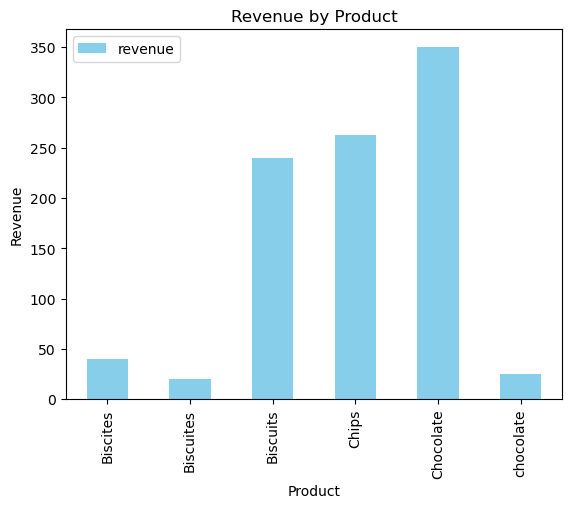

In [31]:
import matplotlib.pyplot as plt

# Create bar chart
df.plot(kind='bar', x='product', y='revenue', color='skyblue')

# Add labels and title
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

# Save the chart if needed
plt.savefig("sales_chart.png")

# Show the plot
plt.show()